<a href="https://colab.research.google.com/github/mahapara2411/devopsgit/blob/main/CLTV%20using%20Probabilistic%20Method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Customer Lifetime Value(CLTV)
"Customer Lifetime Value is a monetary value that represents the amount of revenue or profit a customer will give the company over the period of the relationship" (Source). CLTV demonstrates the implications of acquiring long-term customers compare to short-term customers. Customer lifetime value (CLV) can help us to answers the most important questions about sales to every company: 
- How to Identify the most profitable customers?
- How can a company offer the best product and make the most money?
- How to segment profitable customers?
- How much budget need to spend to acquire customers?
##Calculate Customer Lifetime Value
There are lots of approaches available for calculating CLTV. Everyone has their own view on it. 
- We can compute it by adding profit/revenue from customers in a given cycle. For Example, if the customer is associated with the business for the last 3 years, we can sum all the profit in this 3 years. We can average the profit yearly or half-yearly or monthly, but in this approach, we won's be able to build a predictive model for new customers.
- Build a regression model for existing customers. Take recent six-month data as independent variables and total revenue over three years as a dependent variable and build a regression model on this data.
- CLTV can also implement using RFM(Recency, Frequency, Monetary) values. For more details, you can refer to my tutorial.
- Using the following equation: CLTV = ((Average Order Value x Purchase Frequency)/Churn Rate) x Profit margin.
    -  Customer Value = Average Order Value * Purchase Frequency
    - Average Order Value(AOV) = Total Revenue / Total Number of Orders. AOV represents the mean amount of revenue that the customer spends on an order.
    - Purchase Frequency =  Total Number of Orders / Total Number of Customers. It represents the average number of orders placed by each customer.
    - Churn Rate: Churn Rate is the percentage of customers who have not ordered again.
    - Customer Lifetime = 1/ churn rate
    - Churn Rate= 1-Repeat Rate

In [4]:
!pip install lifetimes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [218]:
import pandas as pd # for dataframes
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting graphs
import datetime as dt
import numpy as np
import io
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import seaborn as sns
import xlrd
import pandas as pd
import datetime
from sklearn.cluster import KMeans

#Importing Lifetimes Liabraries
import lifetimes
from lifetimes import BetaGeoFitter
from lifetimes.plotting import plot_frequency_recency_matrix
from lifetimes.plotting import plot_probability_alive_matrix
from lifetimes.plotting import plot_period_transactions
from lifetimes.utils import calibration_and_holdout_data
from lifetimes.plotting import *
from sklearn.metrics import mean_squared_error
from math import sqrt
from lifetimes import ParetoNBDFitter
from lifetimes.plotting import plot_history_alive
import pickle
from lifetimes import ModifiedBetaGeoFitter
import warnings
warnings.filterwarnings("ignore")
sns.set_theme(style = "darkgrid")

import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected = True)
from lifetimes.plotting import plot_period_transactions
from plotly.subplots import make_subplots

In [219]:
from google.colab import files
uploaded = files.upload()

Saving Retail_Dataset.xlsx to Retail_Dataset (1).xlsx


In [6]:
df = pd.read_excel("Retail_Dataset.xlsx", sheet_name = ["Year 2009-2010", "Year 2010-2011"])

In [7]:
df1 = df["Year 2009-2010"]
df2 = df["Year 2010-2011"]

In [8]:
sum([df1.shape[0], df2.shape[0]])

1067371

In [9]:
data = df1.append(df2)

In [10]:
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom



# **Data Preprocessing**

In [11]:
def check_df(dataframe):
    print("################ Shape ####################")
    print(dataframe.shape)
    print("############### Columns ###################")
    print(dataframe.columns)
    print("############### Types #####################")
    print(dataframe.dtypes)
    print("############### Head ######################")
    print(dataframe.head())
    print("############### Tail ######################")
    print(dataframe.tail())
    print("############### Describe ###################")
    print(dataframe.describe().T)

check_df(data)

################ Shape ####################
(1067371, 8)
############### Columns ###################
Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'CustomerID', 'Country'],
      dtype='object')
############### Types #####################
Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
CustomerID            float64
Country                object
dtype: object
############### Head ######################
  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1067371 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   CustomerID   824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 73.3+ MB


In [13]:
data.isnull().sum()/data.shape[0]*100

Invoice         0.000000
StockCode       0.000000
Description     0.410541
Quantity        0.000000
InvoiceDate     0.000000
Price           0.000000
CustomerID     22.766873
Country         0.000000
dtype: float64

In [14]:
# first drop the rows where the description is null
data.dropna(axis = 0, subset = ["Description"], inplace = True)

In [15]:
data.isnull().sum() #Now let's check the data before droping these customer ID's

Invoice             0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
Price               0
CustomerID     238625
Country             0
dtype: int64

In [16]:
data[data["CustomerID"].isnull()]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
578,489525,85227,SET/6 3D KIT CARDS FOR KIDS,1,2009-12-01 11:49:00,0.85,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


In [17]:
data.iloc[575:, :]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country
576,C489524,21258,VICTORIAN SEWING BOX LARGE,-1,2009-12-01 11:48:00,12.75,15614.0,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
578,489525,85227,SET/6 3D KIT CARDS FOR KIDS,1,2009-12-01 11:49:00,0.85,NaN,United Kingdom
579,489526,85049E,SCANDINAVIAN REDS RIBBONS,12,2009-12-01 11:50:00,1.25,12533.0,Germany
580,489526,21976,PACK OF 60 MUSHROOM CAKE CASES,24,2009-12-01 11:50:00,0.55,12533.0,Germany
...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [18]:
# We have to drop the rows where customer ID is null because it's a unique customer ID of each customer
# So it's better to drop rather than imputing it with some random value

data.dropna(axis = 0, subset = ["CustomerID"], inplace = True)

In [19]:
data.isnull().sum() #Now's there is no null values available in our data

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
CustomerID     0
Country        0
dtype: int64

In [20]:
data['Quantity'][data['Quantity']<=0] = None
data['Quantity'].describe()

count    805620.000000
mean         13.307665
std         144.306739
min           1.000000
25%           2.000000
50%           5.000000
75%          12.000000
max       80995.000000
Name: Quantity, dtype: float64

In [21]:
data['Price'][data['Price']<=0] = None
data['Price'].describe()

count    824293.000000
mean          3.677116
std          70.244404
min           0.001000
25%           1.250000
50%           1.950000
75%           3.750000
max       38970.000000
Name: Price, dtype: float64

In [22]:
data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 824364 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      824364 non-null  object        
 1   StockCode    824364 non-null  object        
 2   Description  824364 non-null  object        
 3   Quantity     805620 non-null  float64       
 4   InvoiceDate  824364 non-null  datetime64[ns]
 5   Price        824293 non-null  float64       
 6   CustomerID   824364 non-null  float64       
 7   Country      824364 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 56.6+ MB


In [23]:
data.duplicated().sum()

26539

In [24]:
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

In [25]:
data.isnull().sum()/data.shape[0]*100

Invoice        0.000000
StockCode      0.000000
Description    0.000000
Quantity       2.297496
InvoiceDate    0.000000
Price          0.008774
CustomerID     0.000000
Country        0.000000
dtype: float64

In [26]:
#exporting the result to csv
data.to_csv("Retail_cleaned_dataset.csv")

In [27]:
data.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12.0,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12.0,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12.0,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48.0,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24.0,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24.0,2009-12-01 07:45:00,1.65,13085.0,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24.0,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10.0,2009-12-01 07:45:00,5.95,13085.0,United Kingdom
8,489435,22350,CAT BOWL,12.0,2009-12-01 07:46:00,2.55,13085.0,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12.0,2009-12-01 07:46:00,3.75,13085.0,United Kingdom


Removing Duplicates
Sometimes we get a messy dataset. we may have to deal with duplicates, which will skew your analysis. 

Let's Jump into Data Insights

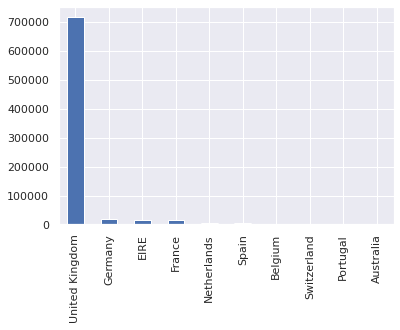

In [28]:
#Top ten country's customer
data.Country.value_counts()[:10].plot(kind='bar')
plt.show()

In [29]:
temp_df = pd.DataFrame(data["Country"].value_counts())

In [30]:
temp_df.head(10)

,Country
United Kingdom,716056
Germany,17338
EIRE,16014
France,13897
Netherlands,5137
Spain,3754
Belgium,3110
Switzerland,3058
Portugal,2414
Australia,1890


In [31]:
names  = temp_df.index

In [32]:
px.scatter(temp_df, y = "Country", color = names, title = "Count of Countries")

In [33]:
#Now let's check the total quantity and by country
data.groupby("Country").sum()["Quantity"].sort_values(ascending = False).head(10)
#data.groupby("Country").sum()["Quantity"].sort_values(ascending = False).tail(10)

Country
United Kingdom    8545921.0
Netherlands        384519.0
EIRE               318271.0
France             270289.0
Denmark            237471.0
Germany            225173.0
Australia          104067.0
Sweden              88495.0
Switzerland         52228.0
Spain               50318.0
Name: Quantity, dtype: float64

In [34]:
px.scatter(data.iloc[:, [5, 7]].groupby(["Country"]).mean(), 
           y = "Price", size = "Price", title = "Average Price by Country", opacity = 0.48)

From the above dot plot we can conclude that the Singapore has the highest averge price followed by the Norway and Malta. Let's go deeper and see the distribution to better understand about our data.

In [35]:
countries = data["Country"].unique()

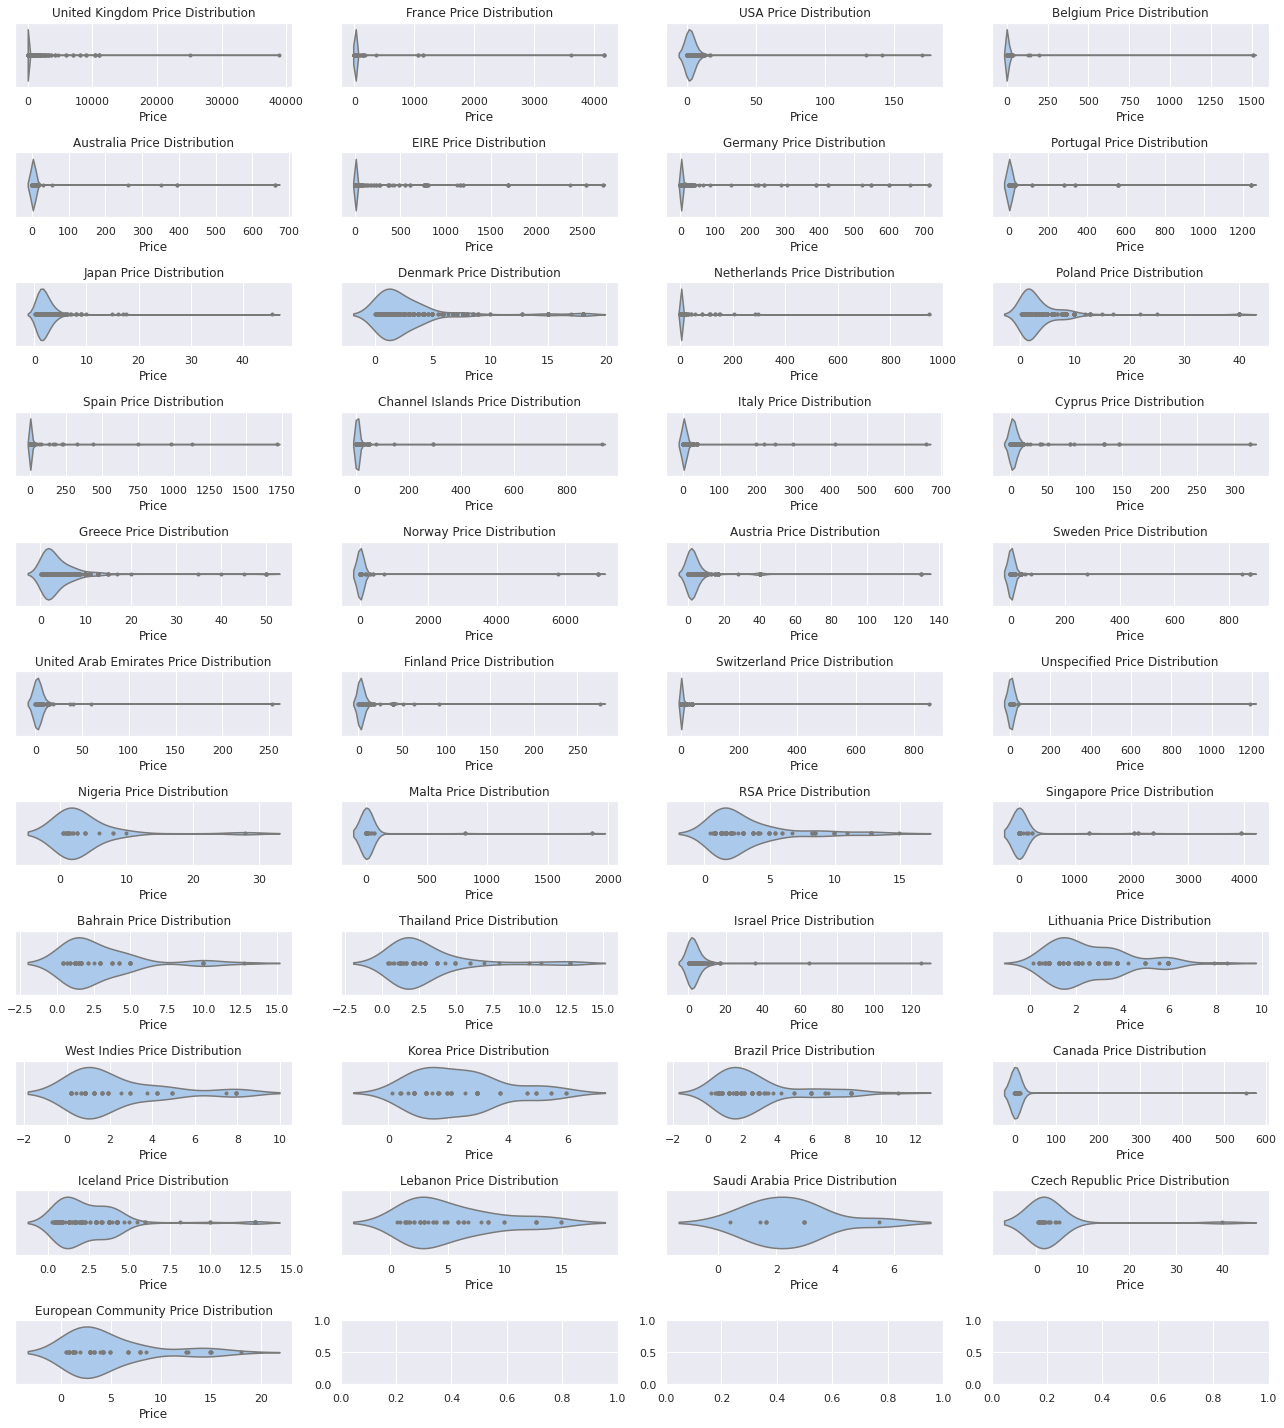

In [36]:
fig, ax = plt.subplots(11, 4, figsize=(18,20))
axes_ = [axes_row for axes in ax for axes_row in axes]

for i, c in enumerate(countries):
    sns.violinplot(x = "Price", data = data[data["Country"] == c], ax = axes_[i], inner = "point", palette = "pastel")
    axes_[i].set_title(c + ' ' + "Price Distribution")
    plt.tight_layout()

From the above plot what I can interpret is that most of the data is pretty skewed and there is lot's of high extreme values that are present in the data.

In [37]:
#Total Number of Unique Invoices 
len(data["Invoice"].unique())

44876

In [38]:
temp_invoice_df = data.groupby("Invoice").sum()

In [39]:
temp_invoice_df.reset_index(inplace = True)

In [40]:
#Below are the top 30 invoices with total quantity purchased by them
temp_invoice_df.sort_values(by = "Quantity", ascending = False).head(30).iloc[:,:2].style.background_gradient(cmap = "Blues")

,Invoice,Quantity
11080,518505,87167.000000
13425,524174,87167.000000
3064,497946,83774.000000
36942,581483,80995.000000
20348,541431,74215.000000
4379,501534,63974.000000
2096,495194,63302.000000
4693,502269,40000.000000
1604,493819,25018.000000
1047,491812,20524.000000


In [41]:
data.groupby(["Invoice"]).mean().head(15).iloc[:, [1]].sort_values("Price", ascending = False)

,Price
Invoice,
489444,141.000000
489447,130.000000
489434,4.081250
489436,3.730526
489437,3.628261
489439,3.560000
489440,3.150000
489446,3.118519
489441,3.042500


I have grouped the data by Invoice to see the average spend by Invoice Number. Here one thing interesting to see that the invoice with number 536374 & 536369 has outspent others. So to gain some better clarity, let's check these 2 invoices and get insights on how much quantity they have purchased so far.

In [42]:
data[(data["Invoice"] == 489444) | (data["Invoice"] == 489447)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country
126,489444,POST,POSTAGE,1.0,2009-12-01 09:55:00,141.0,12636.0,USA
173,489447,POST,POSTAGE,1.0,2009-12-01 10:10:00,130.0,12362.0,Belgium


As we can see above, These 2 invoices with invoice number 536369 and 536374 had only single transaction, that's why the average price was too high.

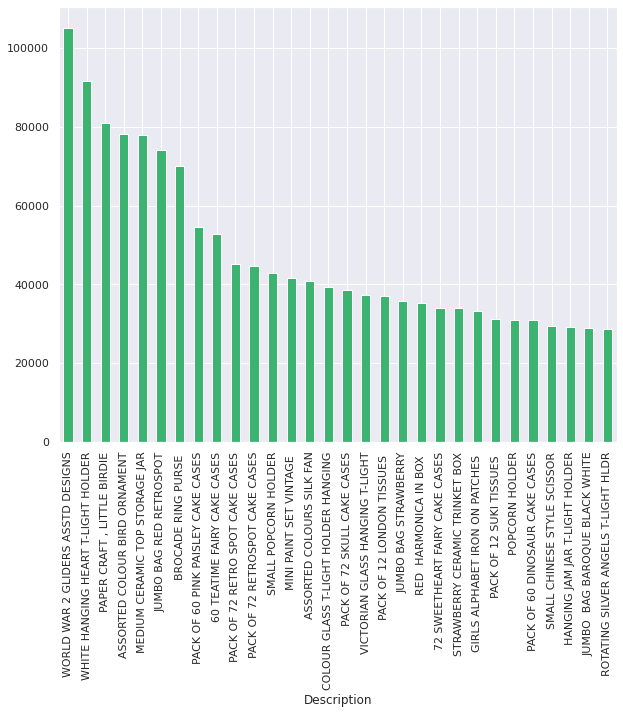

In [43]:
#Let's check which product has been purchased more often so far
plt.figure(figsize=(10,8))
data.groupby("Description").sum().sort_values(by = "Quantity", ascending = False).head(30)["Quantity"].plot(kind = "bar", color = 'mediumseagreen')

**Date Time Analysis**

In [44]:
temp_data = data.copy() #creating a data copy point

In [45]:
temp_data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12.0,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12.0,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12.0,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48.0,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24.0,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [46]:
#Date Time Analysis
temp_data.loc[:, "Month"] = data.InvoiceDate.dt.month
temp_data.loc[:, "Time"] = data.InvoiceDate.dt.time
temp_data.loc[:, "Year"] = data.InvoiceDate.dt.year
temp_data.loc[:, "Day"] = data.InvoiceDate.dt.day
temp_data.loc[:, "Quarter"] = data.InvoiceDate.dt.quarter
temp_data.loc[:, "Day of Week"] = data.InvoiceDate.dt.dayofweek

In [47]:
#Mapping day of week
dayofweek_mapping = dict({0: "Monday", 
                         1: "Tuesday", 
                         2: "Wednesday" , 
                         3: "Thursday", 
                         4: "Friday", 
                         5: "Saturday", 
                         6: "Sunday"})

In [48]:
#renaming the data values using map function
temp_data["Day of Week"] = temp_data["Day of Week"].map(dayofweek_mapping)

In [49]:
temp_data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,Month,Time,Year,Day,Quarter,Day of Week
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12.0,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,12,07:45:00,2009,1,4,Tuesday
1,489434,79323P,PINK CHERRY LIGHTS,12.0,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,12,07:45:00,2009,1,4,Tuesday
2,489434,79323W,WHITE CHERRY LIGHTS,12.0,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,12,07:45:00,2009,1,4,Tuesday
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48.0,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,12,07:45:00,2009,1,4,Tuesday
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24.0,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,12,07:45:00,2009,1,4,Tuesday


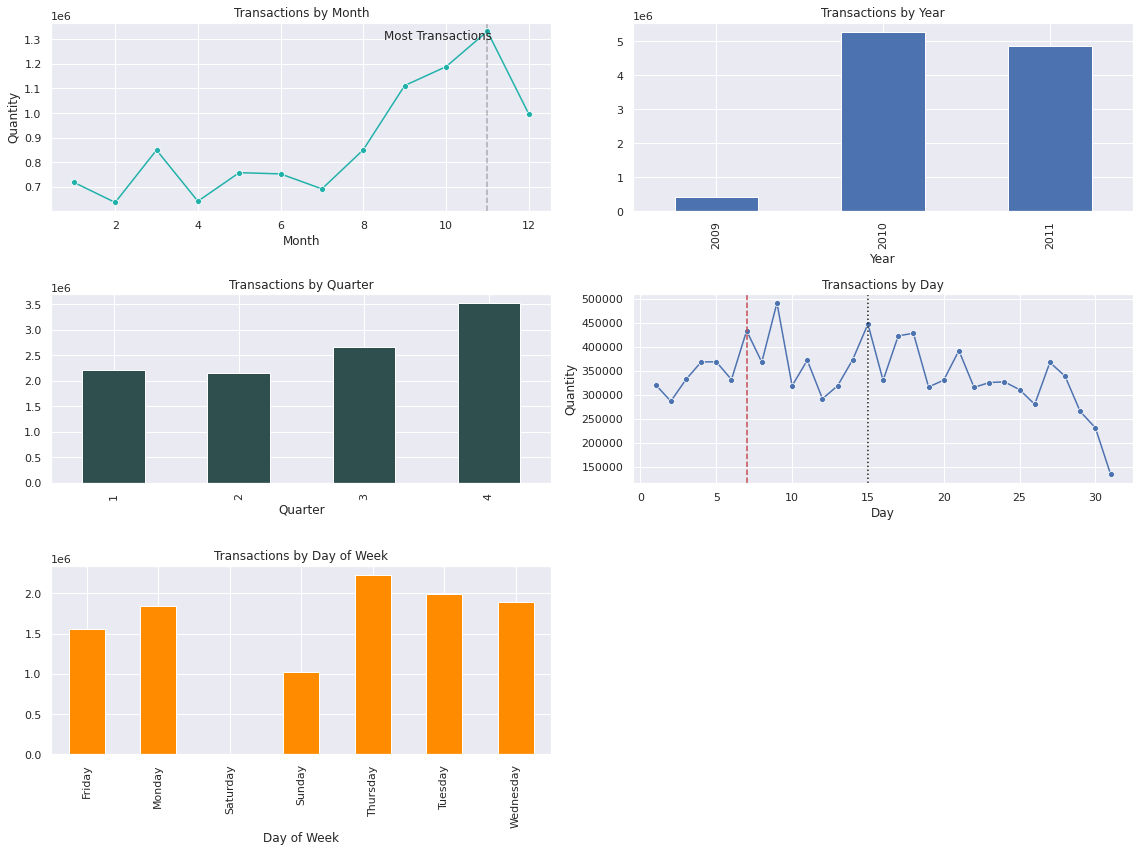

In [50]:
#Plotting the above data
plt.figure(figsize=(16,12))
plt.subplot(3,2,1)
sns.lineplot(x = "Month", y = "Quantity", data = temp_data.groupby("Month").sum("Quantity"), marker = "o", color = "lightseagreen")
plt.axvline(11, color = "k", linestyle = '--', alpha = 0.3)
plt.text(8.50, 1.3e6, "Most Transactions")
plt.title("Transactions by Month")
plt.subplot(3,2,2)
temp_data.groupby("Year").sum()["Quantity"].plot(kind = "bar")
plt.title("Transactions by Year")
plt.subplot(3,2,3)
temp_data.groupby("Quarter").sum()["Quantity"].plot(kind = "bar", color = "darkslategrey")
plt.title("Transactions by Quarter")
plt.subplot(3,2,4)
sns.lineplot(x = "Day", y = "Quantity", data = temp_data.groupby("Day").sum("Quantity"), marker = "o", )
plt.axvline(7, color = 'r', linestyle = '--')
plt.axvline(15, color = 'k', linestyle = "dotted")
plt.title("Transactions by Day")
plt.subplot(3,2,5)
temp_data.groupby("Day of Week").sum()["Quantity"].plot(kind = "bar", color = "darkorange")
plt.title("Transactions by Day of Week")
plt.tight_layout()
plt.show()

In [51]:
print("Total Number of Countries in 2009: {}".format(len(temp_data[temp_data["Year"] == 2009]["Country"].unique())))
print("Total Number of Transactions in 2009: {}".format(temp_data[temp_data["Year"] == 2009]["Quantity"].sum()))
print("--------------------------------------------")
print("Total Number of Countries in 2009: {}".format(len(temp_data[temp_data["Year"] == 2010]["Country"].unique())))
print("Total Number of Transactions in 2009: {}".format(temp_data[temp_data["Year"] == 2010]["Quantity"].sum()))
print("--------------------------------------------")
print("Total Number of Countries in 2009: {}".format(len(temp_data[temp_data["Year"] == 2011]["Country"].unique())))
print("Total Number of Transactions in 2009: {}".format(temp_data[temp_data["Year"] == 2011]["Quantity"].sum()))

Total Number of Countries in 2009: 23
Total Number of Transactions in 2009: 398708.0
--------------------------------------------
Total Number of Countries in 2009: 37
Total Number of Transactions in 2009: 5275173.0
--------------------------------------------
Total Number of Countries in 2009: 36
Total Number of Transactions in 2009: 4854824.0


In [52]:
_2009 = temp_data[temp_data["Year"] == 2009]["Country"].unique()
_2010 = temp_data[temp_data["Year"] == 2010]["Country"].unique()
_2011 = temp_data[temp_data["Year"] == 2011]["Country"].unique()

In [53]:
#checking for the countries which are available in  2010 and 2011 but not in 2009.

no_cols = []

for i in (_2010):
    if i not in _2009:
        no_cols.append(i)
print("These are the values which are not present in 2009: {}".format(no_cols))

These are the values which are not present in 2009: ['Unspecified', 'Nigeria', 'Malta', 'RSA', 'Singapore', 'Bahrain', 'Thailand', 'Israel', 'Lithuania', 'West Indies', 'Korea', 'Brazil', 'Canada', 'Iceland']


**Top 8 Countries With Most Transactions**

In [54]:
temp = data.groupby(["Country", "Description"]).sum()["Quantity"]

In [55]:
temp = pd.DataFrame(temp)

In [56]:
top_8_countries = ["United Kingdom", "Netherlands", "EIRE", "Denmark", "Germany", "France", "Australia", "Sweden"]

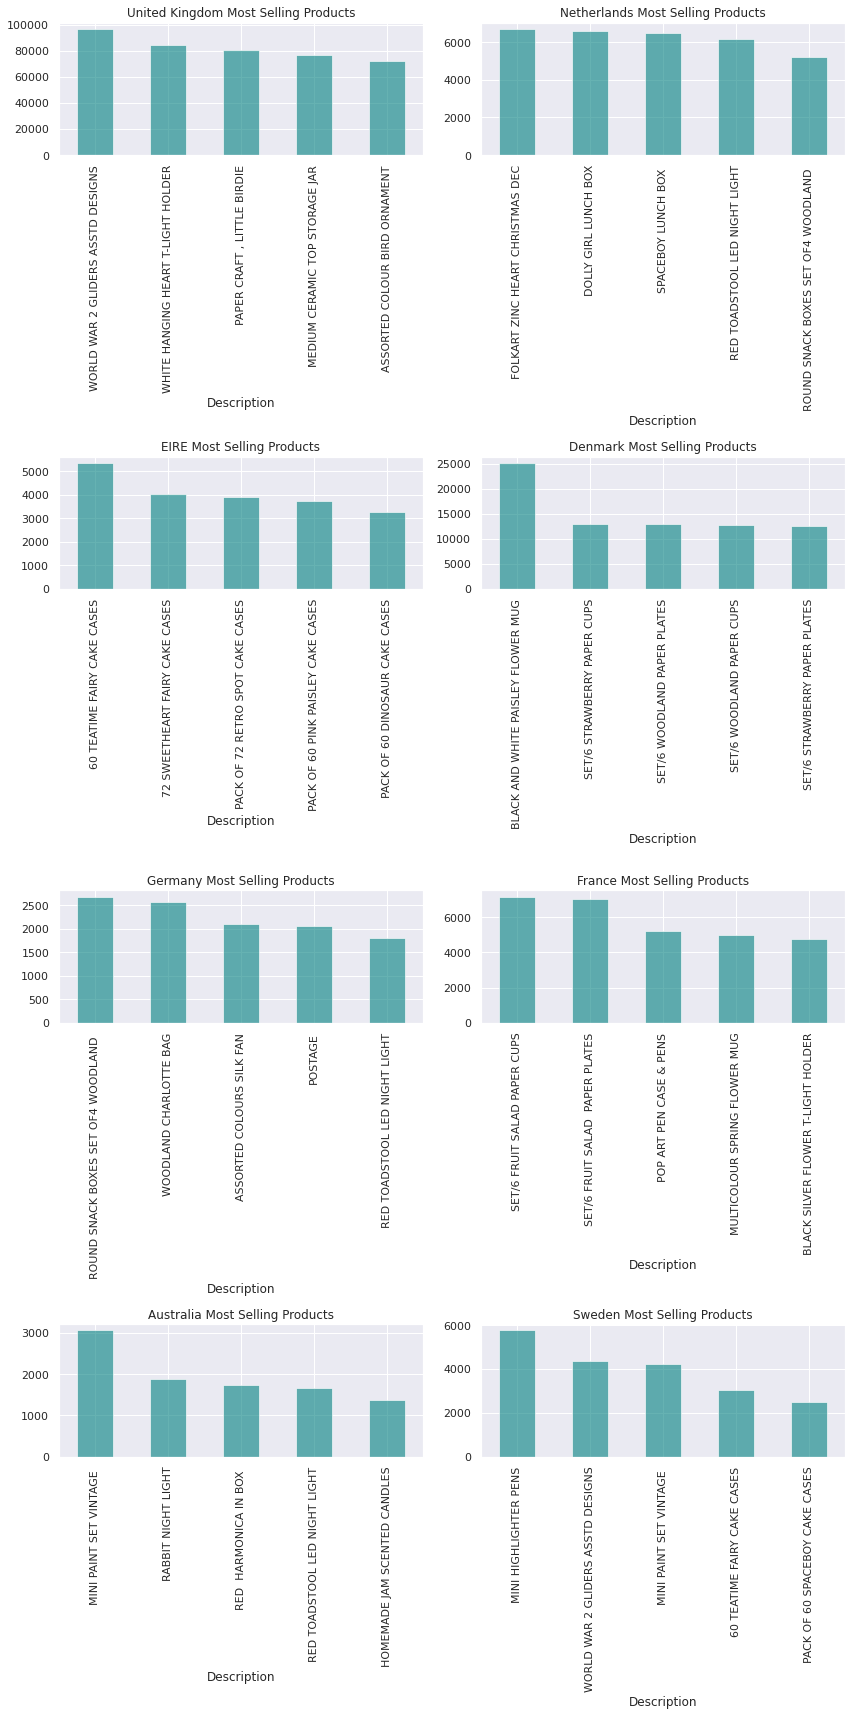

In [57]:
x = 1
plt.figure(figsize=(12,24))
for x, c in enumerate(top_8_countries):
    ax = plt.subplot(4,2, x+1)
    plt.title(c + ' '+ "Most Selling Products")
    temp.loc[c].sort_values(by = "Quantity", ascending = False)["Quantity"].head(5).plot(kind = "bar", ax = ax, color = "teal", alpha = 0.6)
    plt.tight_layout()

**RFM (Recency,Frequency,Monetary) Estimation**

In [58]:
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12.0,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12.0,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12.0,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48.0,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24.0,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [59]:
data["Sales"] = data["Quantity"]*data["Price"]

In [60]:
#calculating the recency, frequency, T, monetary_value
summary = lifetimes.utils.summary_data_from_transaction_data(data, "CustomerID", "InvoiceDate", "Sales")

In [61]:
summary = summary.reset_index() #resetting the index

In [62]:
summary.shape

(5942, 5)

In [63]:
summary.head()

,CustomerID,frequency,recency,T,monetary_value
0,12346.0,10.0,400.0,725.0,7746.646000
1,12347.0,7.0,402.0,404.0,615.714286
2,12348.0,4.0,363.0,438.0,449.310000
3,12349.0,4.0,717.0,735.0,1107.172500
4,12350.0,0.0,0.0,310.0,0.000000


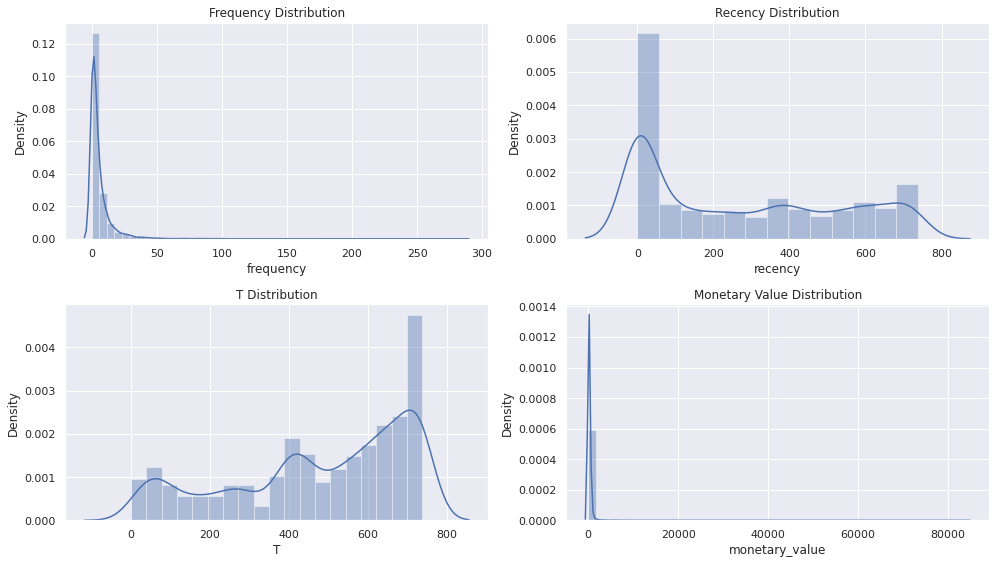

In [64]:
#plotting the distribution
plt.figure(figsize=(14,8))
plt.subplot(221)
sns.distplot(summary["frequency"])
plt.title("Frequency Distribution")
plt.subplot(222)
sns.distplot(summary["recency"])
plt.title("Recency Distribution")
plt.subplot(223)
sns.distplot(summary["T"])
plt.title("T Distribution")
plt.subplot(224)
sns.distplot(summary["monetary_value"])
plt.title("Monetary Value Distribution")
plt.tight_layout()

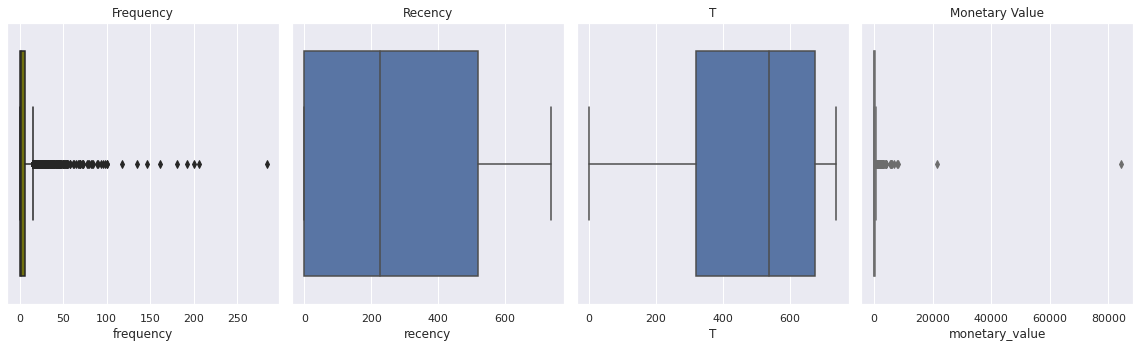

In [65]:
plt.figure(figsize=(16,5))
plt.subplot(141)
sns.boxplot(summary["frequency"], color = "olive")
plt.title("Frequency")
plt.subplot(142)
sns.boxplot(summary["recency"])
plt.title("Recency")
plt.subplot(143)
sns.boxplot(summary["T"])
plt.title("T")
plt.subplot(144)
sns.boxplot(summary["monetary_value"], color = "salmon")
plt.title("Monetary Value")
plt.tight_layout()

In [66]:
summary.describe()

,CustomerID,frequency,recency,T,monetary_value
count,5942.000000,5942.000000,5942.000000,5942.000000,5942.000000
mean,15316.500000,5.479636,275.772299,478.229384,256.689670
std,1715.451981,11.293673,259.830840,223.879537,1188.591999
min,12346.000000,0.000000,0.000000,0.000000,0.000000
25%,13831.250000,0.000000,0.000000,320.500000,0.000000
50%,15316.500000,2.000000,225.000000,536.000000,176.033333
75%,16801.750000,6.000000,518.000000,674.000000,314.124000
max,18287.000000,284.000000,738.000000,738.000000,84236.250000


In [67]:
#checking for the values containing zero.

print("Total Number of Frequency with 0: %s" % (len(summary[summary["frequency"] == 0])))
print("Total Number of Recency with 0: %s" % (len(summary[summary["recency"] == 0])))
print("Total Number of Monetary Value with 0: %s" % (len(summary[summary["monetary_value"] == 0])))

Total Number of Frequency with 0: 1544
Total Number of Recency with 0: 1544
Total Number of Monetary Value with 0: 1727



# Beta Geo - Negative Binomial Distribution + Gamma Gamma Distribution Model **bold text**

In [68]:
summary_bgf = summary.copy()

In [69]:
summary_bgf.head(2)

,CustomerID,frequency,recency,T,monetary_value
0,12346.0,10.0,400.0,725.0,7746.646000
1,12347.0,7.0,402.0,404.0,615.714286


There are 4339 customers under our analysis.
CustomerID 12346 made 1 purchase only (no repeat), so the frequency and recency are 0, and the age is 325 days (e.g. the duration between the first purchase and the end of the period in the analysis).

In [70]:
bgf = BetaGeoFitter(penalizer_coef = 0.0)

# We can use penalizer of 0.001 or 0.1 which we will be going to use later on based on the model performance and model selection

In [71]:
bgf.fit(summary_bgf["frequency"], summary_bgf["recency"], summary_bgf["T"])

<lifetimes.BetaGeoFitter: fitted with 5942 subjects, a: 0.15, alpha: 49.94, b: 2.11, r: 0.67>

Among all customers in our data, more than 35% of them only made purchase once (no repeat).
## Frequency/Recency Analysis Using the BG/NBD Model

In [72]:
bgf.summary

,coef,se(coef),lower 95% bound,upper 95% bound
r,0.668170,0.015453,0.637882,0.698458
alpha,49.943472,1.517728,46.968725,52.918220
a,0.145498,0.014512,0.117055,0.173941
b,2.112726,0.313787,1.497704,2.727749


In [73]:
print(bgf)

<lifetimes.BetaGeoFitter: fitted with 5942 subjects, a: 0.15, alpha: 49.94, b: 2.11, r: 0.67>


### Visualizing our frequency/recency matrix
Let's do some hypothetical analysis-
- Customer who purchased every day for four weeks straight, and no transactions in months; chances of that customer being alive is less. 
- On the other hand, a customer who historically made purchase once a quarter, and again last quarter, is likely still alive. We can visualize this relationship using the frequency/recency matrix, which computes the expected number of transactions an artificial customer is to make in the next time period, given the recency (age at last purchase) and frequency (the number of repeat transactions  made).

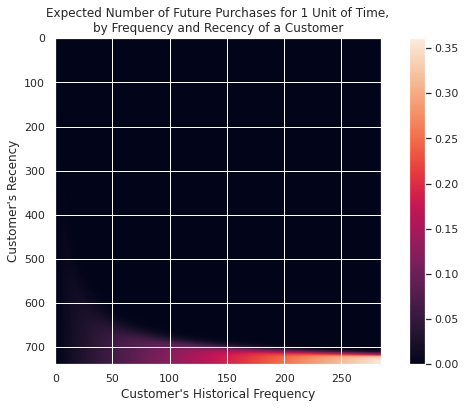

In [75]:
from lifetimes.plotting import plot_frequency_recency_matrix
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,6))
plot_frequency_recency_matrix(bgf)
plt.show()

We can see that, if a customer has made 120 purchases, and their latest purchase was when they were approximately 350 days old (i.e. Recency: the duration between their first transaction and their latest transaction is 350 days), then they are our best customer (bottom-right).

Customers who have purchased a lot and purchased recently will likely be the best customers in the future. We will never have enough of them.

Customers who have purchased a lot but not recently (top-right corner), have probably gone.
There are also another type of customers that around (40, 100) that represents the customer who buys infrequently, and we have not seen them recently, so they might buy again. However, we are not sure if they have gone or just between purchases.

Another interesting matrix to look at is the probability of still being alive:


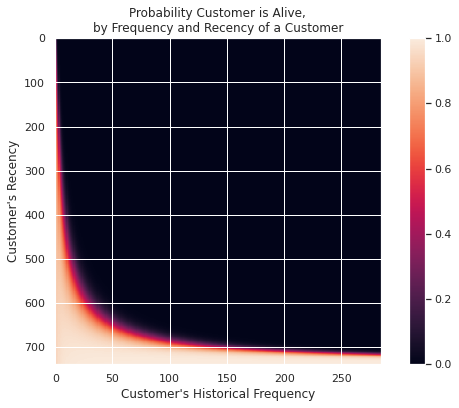

In [76]:
from lifetimes.plotting import plot_probability_alive_matrix
fig = plt.figure(figsize=(10,6))
plot_probability_alive_matrix(bgf)
plt.show()

Customers who have purchased recently are almost surely “alive”.
Customers who have purchased a lot but not recently, are likely to have dropped out. And the more they bought in the past, the more likely they have dropped out. They are represented in the upper-right.

**Ranking customers from best to worst**

Let’s return to our customers and rank them from “highest expected purchases in the next period” to lowest. Models expose a method that will predict a customer’s expected purchases in the next period using their history.

In [ ]:
summary_bgf["p_not_alive"] = 1-bgf.conditional_probability_alive(summary_bgf["frequency"], summary_bgf["recency"], summary_bgf["T"])
summary_bgf["p_alive"] = bgf.conditional_probability_alive(summary_bgf["frequency"], summary_bgf["recency"], summary_bgf["T"])

In [77]:
t = 30
summary_bgf['predicted_purchases'] = bgf.conditional_expected_number_of_purchases_up_to_time(t, summary_bgf['frequency'], summary_bgf['recency'], summary_bgf['T'])
summary_bgf.sort_values(by='predicted_purchases', ascending=False).head(10).reset_index()


,index,CustomerID,frequency,recency,T,monetary_value,probability_alive,predicted_purchases
0,2565,14911.0,284.0,737.0,738.0,1023.546408,0.999268,10.800953
1,402,12748.0,206.0,735.0,735.0,258.904320,0.999298,7.871598
2,2965,15311.0,201.0,738.0,738.0,567.877612,0.999281,7.651860
3,5495,17841.0,193.0,736.0,737.0,352.432850,0.999042,7.355876
4,2260,14606.0,181.0,735.0,736.0,164.289337,0.998994,6.908522
5,743,13089.0,161.0,735.0,737.0,702.166522,0.998648,6.138042
6,1810,14156.0,147.0,729.0,738.0,2124.971565,0.994671,5.577115
7,2181,14527.0,135.0,735.0,737.0,194.985852,0.998493,5.150112
8,4076,16422.0,118.0,721.0,738.0,524.753136,0.984005,4.433800
9,1452,13798.0,101.0,730.0,731.0,742.028416,0.998380,3.888581


Listed above are our top 10 customers that the model expects them to make purchases in the next day. We can see that the customer who has made 131 purchases, and bought very recently from us, is probably going to buy again in the next period.


The predicted_purchases column represents their expected number of purchases while the other three columns represent their current RF metrics. The BG/NBD model believes these individuals will be making more purchases within the near future as they are our current best customers.
#### Assessing model fit
So far, we can predict and we can visualize our customers’ behavior. Now let us assess the model’s correctness. The ﬁrst is to compare your data versus artiﬁcial data simulated with our ﬁtted model’s parameters.


CPU times: user 957 ms, sys: 11 ms, total: 968 ms
Wall time: 957 ms


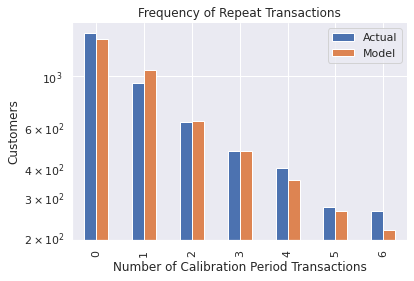

In [78]:
%%time 

from lifetimes.plotting import plot_period_transactions
ax = plot_period_transactions(bgf, max_frequency=7)
ax.set_yscale('log')
sns.despine();

We can see that our actual data and our simulated data line up well. 
So, we can continue on with our analysis. We now partition the dataset into a calibration period dataset and a holdout dataset. This is important as we want to test how our model performs on data not yet seen (just like cross-validation in machine learning practice).

### Example using transactional datasets
Most often, the dataset you have at hand will be at the transaction level. Lifetimes has some utility functions to transform that transactional data (one row per purchase) into summary data (a frequency, recency and age dataset).

In [79]:
from lifetimes.datasets import load_transaction_data
from lifetimes.utils import summary_data_from_transaction_data
from lifetimes.plotting import plot_history_alive
transaction_data = load_transaction_data()
print(transaction_data.head())

                  date  id
0  2014-03-08 00:00:00   0
1  2014-05-21 00:00:00   1
2  2014-03-14 00:00:00   2
3  2014-04-09 00:00:00   2
4  2014-05-21 00:00:00   2


In [80]:
#dividing our dataset into training & holdout
summary_cal_holdout = calibration_and_holdout_data(data, "CustomerID", "InvoiceDate", 
                                                   calibration_period_end = '2011-06-08',
                                                  observation_period_end = '2011-12-09')

In [81]:
bgf.fit(summary_cal_holdout["frequency_cal"],
       summary_cal_holdout["recency_cal"],
       summary_cal_holdout["T_cal"])

<lifetimes.BetaGeoFitter: fitted with 5025 subjects, a: 0.22, alpha: 49.70, b: 2.72, r: 0.67>

### More model fitting
With transactional data, we can partition the dataset into a calibration period dataset and a holdout dataset. This is important as we want to test how our model performs on data not yet seen (think cross-validation in standard machine learning literature).

In [82]:
summary_cal_holdout

,frequency_cal,recency_cal,T_cal,frequency_holdout,duration_holdout
CustomerID,,,,,
12346.0,10.0,400.0,541.0,0.0,184.0
12347.0,3.0,158.0,220.0,4.0,184.0
12348.0,3.0,190.0,254.0,1.0,184.0
12349.0,3.0,328.0,551.0,1.0,184.0
12350.0,0.0,0.0,126.0,0.0,184.0
...,...,...,...,...,...
18283.0,9.0,458.0,474.0,9.0,184.0
18284.0,1.0,2.0,247.0,0.0,184.0
18285.0,0.0,0.0,476.0,0.0,184.0


With this dataset, we can perform ﬁtting on the _cal columns, and test on the _holdout columns:


CPU times: user 53.8 ms, sys: 41.3 ms, total: 95.1 ms
Wall time: 49.6 ms


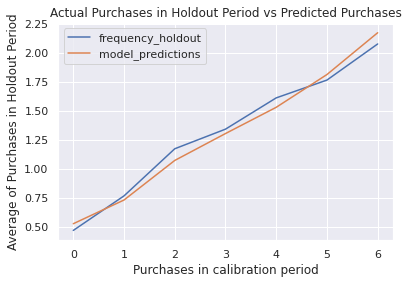

In [83]:
%%time 

from lifetimes.plotting import plot_calibration_purchases_vs_holdout_purchases
plot_calibration_purchases_vs_holdout_purchases(bgf, summary_cal_holdout)

In [84]:
summary_cal_holdout.head()

,frequency_cal,recency_cal,T_cal,frequency_holdout,duration_holdout
CustomerID,,,,,
12346.0,10.0,400.0,541.0,0.0,184.0
12347.0,3.0,158.0,220.0,4.0,184.0
12348.0,3.0,190.0,254.0,1.0,184.0
12349.0,3.0,328.0,551.0,1.0,184.0
12350.0,0.0,0.0,126.0,0.0,184.0


In [85]:
#Creating a function which can predict the future purchased value based on the lookup window

def bgf_get_pred_error(t, id_):
    
    individual = summary_bgf[summary_bgf["CustomerID"] == id_]
    
    ind_pred = bgf.predict(t, individual["frequency"], individual["recency"], individual["T"])
    
    actual_val = individual["frequency"]/individual["recency"]*t
    
    error = actual_val - ind_pred
    
    print("Your Predicted Purchase: %s" % (ind_pred))
    print("Your Actual Purchase: %s" % (actual_val))
    print("Prediction Error: %s" % (error))

In [86]:
bgf_get_pred_error(15, 12348.0)

Your Predicted Purchase: 2    0.132161
dtype: float64
Your Actual Purchase: 2    0.165289
dtype: float64
Prediction Error: 2    0.033128
dtype: float64


In [87]:
id_1 = 14606.0
id_2 = 12352.0

In [88]:
days_since_birth = 365

In [89]:
sp_trans_1 = data[data["CustomerID"] == id_1]
sp_trans_2 = data[data["CustomerID"] == id_2]

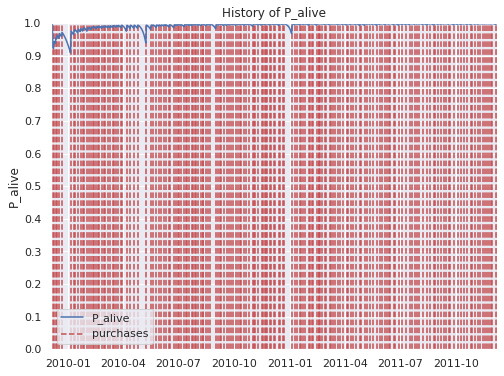

In [90]:
plt.figure(figsize=(8,6))
plot_history_alive(bgf, days_since_birth, sp_trans_1, "InvoiceDate")

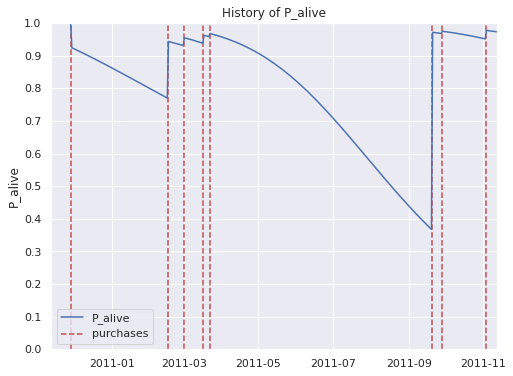

In [91]:
plt.figure(figsize=(8,6))
plot_history_alive(bgf, days_since_birth, sp_trans_2, "InvoiceDate")

In [92]:
summary_bgf["actual_30"] = summary_bgf["frequency"]/summary_bgf["recency"]*30

In [93]:
summary_bgf.head()

,CustomerID,frequency,recency,T,monetary_value,probability_alive,predicted_purchases,actual_30
0,12346.0,10.0,400.0,725.0,7746.646000,0.187816,0.077362,0.750000
1,12347.0,7.0,402.0,404.0,615.714286,0.981786,0.495352,0.522388
2,12348.0,4.0,363.0,438.0,449.310000,0.941600,0.269178,0.330579
3,12349.0,4.0,717.0,735.0,1107.172500,0.969262,0.172500,0.167364
4,12350.0,0.0,0.0,310.0,0.000000,1.000000,0.055446,NaN


In [94]:
summary_bgf = summary_bgf.fillna(value = 0) #filling null values with 0

In [95]:
#calculating the prediction error for the 30 days purchase prediction
summary_bgf["Error"] = summary_bgf["actual_30"] - summary_bgf["predicted_purchases"]

In [96]:
mse = mean_squared_error(summary_bgf["actual_30"],summary_bgf["predicted_purchases"])

In [97]:
print("Mean Squared Error: %s" % mse)
print("Average Error:  %s" % summary_bgf["Error"].mean())
print("Root Mean Squared Error: %s" % sqrt(mse))

Mean Squared Error: 4.337882659974866
Average Error:  0.41179765536782564
Root Mean Squared Error: 2.082758425736136


In [98]:
#Purchase Prediction

bgf_mse_purchase_30 = mean_squared_error(summary_bgf["actual_30"],summary_bgf["predicted_purchases"])
bgf_rmse_purchase_30 = sqrt(bgf_mse_purchase_30)
bgf_avg_error_purchase_30 = summary_bgf["Error"].mean()

In [99]:
summary_bgf.head()

,CustomerID,frequency,recency,T,monetary_value,probability_alive,predicted_purchases,actual_30,Error
0,12346.0,10.0,400.0,725.0,7746.646000,0.187816,0.077362,0.750000,0.672638
1,12347.0,7.0,402.0,404.0,615.714286,0.981786,0.495352,0.522388,0.027036
2,12348.0,4.0,363.0,438.0,449.310000,0.941600,0.269178,0.330579,0.061401
3,12349.0,4.0,717.0,735.0,1107.172500,0.969262,0.172500,0.167364,-0.005136
4,12350.0,0.0,0.0,310.0,0.000000,1.000000,0.055446,0.000000,-0.055446


In [100]:
#Filtering the data where we have the values of 0 or less than 0.
res_summary = summary_bgf[summary_bgf["frequency"] > 0]

In [101]:
final_summary = res_summary[res_summary["monetary_value"] > 0]

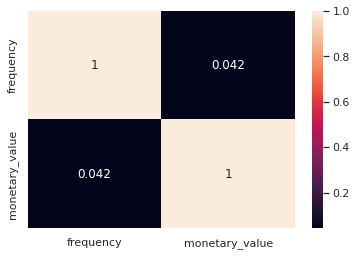

In [102]:
sns.heatmap(final_summary[["frequency", "monetary_value"]].corr(), annot = True)

To proceed with the Gamma Gamma Model we have to check for the assumption whether the frequency and monetary values are intercorrelated or not. As we can see here, the correlation between the frequency and monetary value is pretty low so we can go ahead to build Gamma Gamma Model

In [103]:
ggf_gamma = lifetimes.GammaGammaFitter(penalizer_coef = 0.001)

In [104]:
ggf_gamma.fit(final_summary["frequency"], final_summary["monetary_value"])

<lifetimes.GammaGammaFitter: fitted with 4215 subjects, p: 11.18, q: 0.93, v: 11.23>

In [105]:
ggf_gamma.summary

,coef,se(coef),lower 95% bound,upper 95% bound
p,11.177764,0.218961,10.748601,11.606928
q,0.931950,0.017942,0.896784,0.967116
v,11.230563,0.225743,10.788107,11.673018


In [106]:
summary_bgf.head(2)

,CustomerID,frequency,recency,T,monetary_value,probability_alive,predicted_purchases,actual_30,Error
0,12346.0,10.0,400.0,725.0,7746.646000,0.187816,0.077362,0.750000,0.672638
1,12347.0,7.0,402.0,404.0,615.714286,0.981786,0.495352,0.522388,0.027036


In [107]:
summary_ = summary_bgf[(summary_bgf["monetary_value"] > 0) & (summary_bgf["frequency"] > 0)]

In [108]:
summary_.shape

(4215, 9)

In [109]:
summary_["Expected_Avg_Sales"] = ggf_gamma.conditional_expected_average_profit(summary_["frequency"], 
                                                                        summary_["monetary_value"])

In [110]:
summary_.head()

,CustomerID,frequency,recency,T,monetary_value,probability_alive,predicted_purchases,actual_30,Error,Expected_Avg_Sales
0,12346.0,10.0,400.0,725.0,7746.646000,0.187816,0.077362,0.750000,0.672638,7752.488768
1,12347.0,7.0,402.0,404.0,615.714286,0.981786,0.495352,0.522388,0.027036,617.856010
2,12348.0,4.0,363.0,438.0,449.310000,0.941600,0.269178,0.330579,0.061401,452.806812
3,12349.0,4.0,717.0,735.0,1107.172500,0.969262,0.172500,0.167364,-0.005136,1111.672104
6,12352.0,8.0,356.0,392.0,338.261250,0.967728,0.566836,0.674157,0.107321,339.923752


In [111]:
print("Expected Average Sales: %s" % summary_["Expected_Avg_Sales"].mean())
print("Actual Average Sales: %s" % summary_["monetary_value"].mean())
print("Difference: %s" % (summary_["monetary_value"].mean() - summary_["Expected_Avg_Sales"].mean()))
print("Mean Squared Error: %s" % mean_squared_error(summary_["monetary_value"], summary_["Expected_Avg_Sales"]))
print("Root Mean Squared Error: %s" % sqrt(mean_squared_error(summary_["monetary_value"], summary_["Expected_Avg_Sales"])))

Expected Average Sales: 366.82898415306636
Actual Average Sales: 361.862400990899
Difference: -4.966583162167353
Mean Squared Error: 65.79109301822459
Root Mean Squared Error: 8.111170878376598


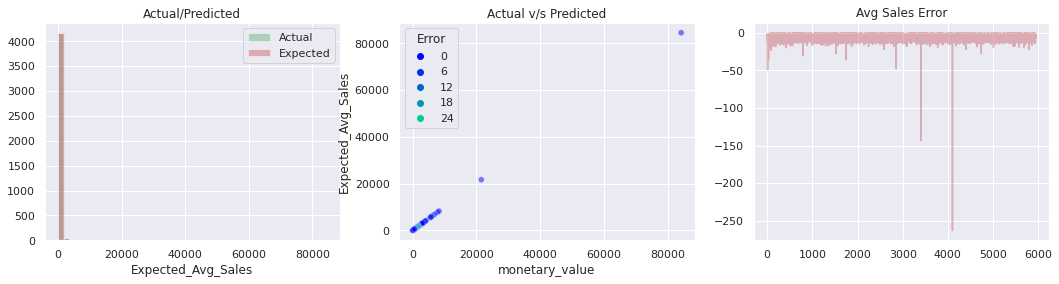

In [112]:
plt.figure(figsize=(18,4))
plt.subplot(131)
sns.distplot(summary_["monetary_value"], color = "g", kde = False)
sns.distplot(summary_["Expected_Avg_Sales"], color = "r", kde = False)
plt.title("Actual/Predicted")
plt.legend(["Actual", "Expected"])
plt.subplot(132)
sns.scatterplot(summary_["monetary_value"], summary_["Expected_Avg_Sales"], alpha = 0.5, hue = summary_["Error"], palette = "winter")
plt.title("Actual v/s Predicted")
plt.subplot(133)
plt.plot(summary_["monetary_value"]-summary_["Expected_Avg_Sales"], color = 'r', alpha = 0.4)
plt.title("Avg Sales Error")
plt.show()

In [113]:
summary_["predicted_clv"] = ggf_gamma.customer_lifetime_value(bgf,
                                                       summary_["frequency"],
                                                       summary_["recency"],
                                                       summary_["T"],
                                                       summary_["monetary_value"],
                                                       time = 30,
                                                       freq = 'D',
                                                       discount_rate = 0.01)

In [114]:
summary_.head()

,CustomerID,frequency,recency,T,monetary_value,probability_alive,predicted_purchases,actual_30,Error,Expected_Avg_Sales,predicted_clv
0,12346.0,10.0,400.0,725.0,7746.646000,0.187816,0.077362,0.750000,0.672638,7752.488768,10442.457246
1,12347.0,7.0,402.0,404.0,615.714286,0.981786,0.495352,0.522388,0.027036,617.856010,6978.024200
2,12348.0,4.0,363.0,438.0,449.310000,0.941600,0.269178,0.330579,0.061401,452.806812,2774.547678
3,12349.0,4.0,717.0,735.0,1107.172500,0.969262,0.172500,0.167364,-0.005136,1111.672104,4551.906658
6,12352.0,8.0,356.0,392.0,338.261250,0.967728,0.566836,0.674157,0.107321,339.923752,4350.644771


In [115]:
# CLV in terms of profit (profit margin is 5%)
profit_margin = 0.05
summary_["CLV"] = summary_["predicted_clv"]*profit_margin
summary_.head()

,CustomerID,frequency,recency,T,monetary_value,probability_alive,predicted_purchases,actual_30,Error,Expected_Avg_Sales,predicted_clv,CLV
0,12346.0,10.0,400.0,725.0,7746.646000,0.187816,0.077362,0.750000,0.672638,7752.488768,10442.457246,522.122862
1,12347.0,7.0,402.0,404.0,615.714286,0.981786,0.495352,0.522388,0.027036,617.856010,6978.024200,348.901210
2,12348.0,4.0,363.0,438.0,449.310000,0.941600,0.269178,0.330579,0.061401,452.806812,2774.547678,138.727384
3,12349.0,4.0,717.0,735.0,1107.172500,0.969262,0.172500,0.167364,-0.005136,1111.672104,4551.906658,227.595333
6,12352.0,8.0,356.0,392.0,338.261250,0.967728,0.566836,0.674157,0.107321,339.923752,4350.644771,217.532239


In [116]:
# Distribution of CLV for the business in the next 30 days
summary_['CLV'].describe()

count    4.215000e+03
mean     1.951953e+02
std      8.295017e+02
min      1.733010e-08
25%      2.573669e+01
50%      7.003894e+01
75%      1.742320e+02
max      2.620163e+04
Name: CLV, dtype: float64

In [117]:
summary_[summary_["CustomerID"] == 13902.0]

,CustomerID,frequency,recency,T,monetary_value,probability_alive,predicted_purchases,actual_30,Error,Expected_Avg_Sales,predicted_clv,CLV
1556,13902.0,5.0,99.0,731.0,6819.052,0.003492,0.000758,1.515152,1.514393,6829.613844,88.09487,4.404744


In [118]:
summary_.sort_values(by = "Error", ascending = False)

,CustomerID,frequency,recency,T,monetary_value,probability_alive,predicted_purchases,actual_30,Error,Expected_Avg_Sales,predicted_clv,CLV
5276,17622.0,2.0,2.0,598.0,196.665,0.024833,0.003059,30.000000,29.996941,202.897902,11.405036,0.570252
3448,15794.0,1.0,1.0,737.0,102.000,0.131137,0.008321,30.000000,29.991679,113.924132,19.484676,0.974234
2587,14933.0,1.0,1.0,444.0,885.000,0.247123,0.024949,30.000000,29.975051,901.720232,460.536788,23.026839
2884,15230.0,1.0,1.0,240.0,59.400,0.443906,0.076162,30.000000,29.923838,71.063195,110.492133,5.524607
3354,15700.0,1.0,1.0,173.0,3.900,0.553053,0.123193,30.000000,29.876807,15.223242,38.172948,1.908647
...,...,...,...,...,...,...,...,...,...,...,...,...
1677,14023.0,1.0,243.0,250.0,310.930,0.933154,0.154797,0.123457,-0.031340,324.133889,1129.666477,56.483324
4149,16495.0,1.0,273.0,276.0,401.750,0.934634,0.142739,0.109890,-0.032849,415.510187,1345.029020,67.251451
2174,14520.0,1.0,289.0,290.0,105.600,0.935273,0.136983,0.103806,-0.033177,117.546183,366.456682,18.322834
4904,17250.0,1.0,258.0,261.0,219.320,0.934588,0.149580,0.116279,-0.033301,231.962751,783.782937,39.189147


In [119]:
actual = summary_["monetary_value"]*summary_["actual_30"]

In [120]:
pred = summary_["Expected_Avg_Sales"]*summary_["predicted_purchases"]

In [121]:
error = actual - pred

In [122]:
result = pd.DataFrame([actual, pred, error], index = ["Actual", "Predicted", "Error"]).T

In [123]:
print("Average Error: %s" % result["Error"].mean())
print("Mean Squared Error: %s" % mean_squared_error(result["Actual"], result["Predicted"]))
print("Root Mean Squared Error: %s" % sqrt(mean_squared_error(result["Actual"], result["Predicted"])))

Average Error: 137.178030469121
Mean Squared Error: 2943006.0021346095
Root Mean Squared Error: 1715.519164024293


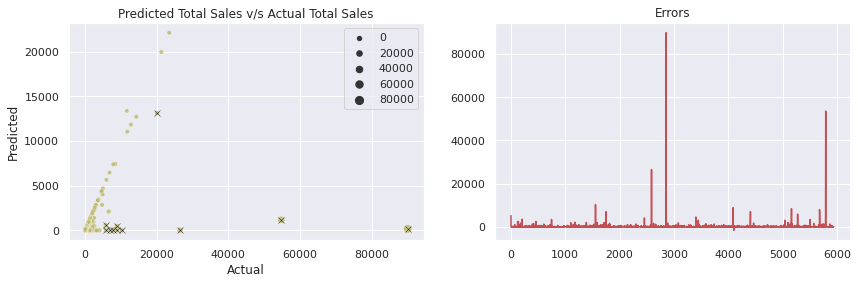

In [124]:
#Predicted v/s Actual
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.scatterplot(result["Actual"], result["Predicted"], size = result["Error"], color = "darkkhaki", alpha = 0.8, marker = 'o')
sns.scatterplot((result[result["Error"] > 5000]["Actual"]), (result[result["Error"] > 5000]["Predicted"]), color = "k", marker = "x")
plt.title("Predicted Total Sales v/s Actual Total Sales")
plt.subplot(122)
plt.plot(result["Error"], color = "r")
plt.title("Errors")
plt.show()

# **PARETO/NBD MODEL + Gamma Gamma Distribution Model**

In [126]:
summary_pnbd = summary.copy()

In [127]:
summary_pnbd.shape

(5942, 5)

In [128]:
pareto_nbd = ParetoNBDFitter(penalizer_coef = 0.0)
pareto_nbd.fit(summary_pnbd["frequency"], summary_pnbd["recency"], summary_pnbd["T"])

<lifetimes.ParetoNBDFitter: fitted with 5942 subjects, alpha: 63.88, beta: 124.22, r: 0.83, s: 0.16>

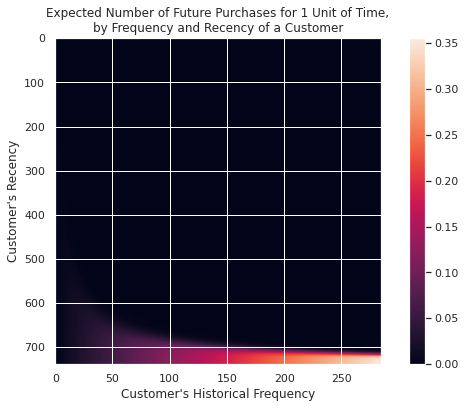

In [130]:
plt.figure(figsize=(10,6))
plot_frequency_recency_matrix(pareto_nbd)

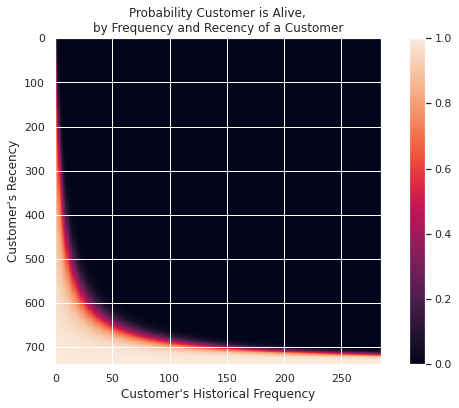

In [131]:
plt.figure(figsize=(10,6))
plot_probability_alive_matrix(pareto_nbd)

In [132]:
summary_pnbd["p_not_alive"] = 1-pareto_nbd.conditional_probability_alive(summary_pnbd["frequency"], summary_pnbd["recency"], summary_pnbd["T"])
summary_pnbd["p_alive"] = pareto_nbd.conditional_probability_alive(summary_pnbd["frequency"], summary_pnbd["recency"], summary_pnbd["T"])

In [133]:
t = 30
summary_pnbd["predicted_purchases"] = pareto_nbd.conditional_expected_number_of_purchases_up_to_time(t, summary_pnbd["frequency"], summary_pnbd["recency"],summary_pnbd["T"])

In [134]:
summary_pnbd.sort_values(by = "predicted_purchases").head()

,CustomerID,frequency,recency,T,monetary_value,probability_alive,p_not_alive,p_alive,predicted_purchases
489,12835.0,37.0,318.0,736.0,154.371351,6.588621e-11,1.000000,1.695544e-10,2.399200e-10
747,13093.0,70.0,468.0,735.0,759.296857,5.551499e-11,1.000000,1.380985e-10,3.663059e-10
3287,15633.0,16.0,222.0,731.0,259.004375,1.817967e-06,0.999996,3.558284e-06,2.254388e-06
1100,13446.0,17.0,243.0,663.0,196.511765,1.247222e-05,0.999976,2.393934e-05,1.756687e-05
4408,16754.0,20.0,269.0,641.0,3155.303500,1.113398e-05,0.999978,2.181236e-05,1.928039e-05


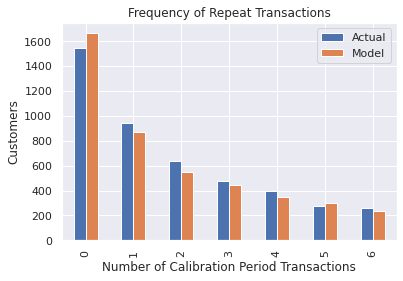

In [135]:
plot_period_transactions(pareto_nbd)

In [136]:
#dividing our dataset into training & holdout
pareto_summary_cal_holdout = calibration_and_holdout_data(data, "CustomerID", "InvoiceDate", 
                                                  calibration_period_end = '2011-06-08',
                                                  observation_period_end = '2011-12-09')

In [137]:
pareto_summary_cal_holdout.head()

,frequency_cal,recency_cal,T_cal,frequency_holdout,duration_holdout
CustomerID,,,,,
12346.0,10.0,400.0,541.0,0.0,184.0
12347.0,3.0,158.0,220.0,4.0,184.0
12348.0,3.0,190.0,254.0,1.0,184.0
12349.0,3.0,328.0,551.0,1.0,184.0
12350.0,0.0,0.0,126.0,0.0,184.0


In [138]:
pareto_nbd.fit(pareto_summary_cal_holdout["frequency_cal"],
               pareto_summary_cal_holdout["recency_cal"],
               pareto_summary_cal_holdout["T_cal"])

<lifetimes.ParetoNBDFitter: fitted with 5025 subjects, alpha: 63.65, beta: 1209.28, r: 0.82, s: 1.08>

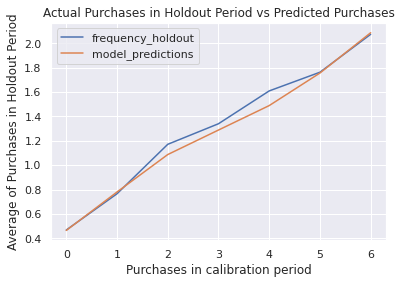

In [139]:
plot_calibration_purchases_vs_holdout_purchases(pareto_nbd, pareto_summary_cal_holdout)

In [140]:
#Creating a function which can predict the future purchased value based on the lookup window

def pareto_get_pred_error(t, id_):
    
    individual_p = summary_pnbd[summary_pnbd["CustomerID"] == id_]
    
    ind_pred_p = pareto_nbd.predict(t, individual_p["frequency"], individual_p["recency"], individual_p["T"])
    
    actual_val_p = individual_p["frequency"]/individual_p["recency"]*t
    
    error = actual_val_p - ind_pred_p
    
    print("Your Predicted Purchase: %s" % (ind_pred_p))
    print("Your Actual Purchase: %s" % (actual_val_p))
    print("Prediction Error: %s" % (error))

In [141]:
pareto_get_pred_error(30, 12346.0)

Your Predicted Purchase: 0    0.032937
dtype: float64
Your Actual Purchase: 0    0.75
dtype: float64
Prediction Error: 0    0.717063
dtype: float64


In [142]:
summary_pnbd["actual_30_p"] = summary_pnbd["frequency"]/summary_pnbd["recency"]*30

In [143]:
summary_pnbd["actual_30_p"].fillna(0, inplace = True)

In [144]:
summary_pnbd["p_error"] = summary_pnbd["actual_30_p"]-summary_pnbd["predicted_purchases"]

In [145]:
print("Mean Squared Error: %s" % mean_squared_error(summary_pnbd["actual_30_p"], summary_pnbd["predicted_purchases"]))
print("Root Mean Squared Error: %s" % sqrt(mean_squared_error(summary_pnbd["actual_30_p"], summary_pnbd["predicted_purchases"])))
print("Average Purchase Error: %s" %(summary_pnbd["p_error"].mean()))

Mean Squared Error: 4.335934771788818
Root Mean Squared Error: 2.0822907510212922
Average Purchase Error: 0.41236723428579025


In [146]:
pareto_mse_purchase = mean_squared_error(summary_pnbd["actual_30_p"], summary_pnbd["predicted_purchases"])
pareto_rmse_purchase = sqrt(mean_squared_error(summary_pnbd["actual_30_p"], summary_pnbd["predicted_purchases"]))
pareto_avg_error_purchase = summary_pnbd["p_error"].mean()

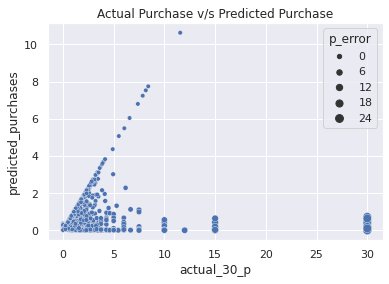

In [147]:
sns.scatterplot(summary_pnbd["actual_30_p"], summary_pnbd["predicted_purchases"], size = summary_pnbd["p_error"])
plt.title("Actual Purchase v/s Predicted Purchase")
plt.show()

In [148]:
#Get the history alive plot to check whether the customer is alive or not

def get_history_alive(t_, data_, id_):
    
    individual_alive = data[data["CustomerID"] == id_]
    plot_history_alive(pareto_nbd, t = t_, transactions = individual_alive, datetime_col = "InvoiceDate",
                  freq = "D")

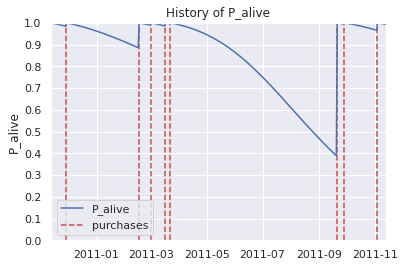

In [149]:
get_history_alive(365, data, 12352.0)

In [150]:
summary_copy = summary_pnbd.copy()

In [151]:
summary_copy = summary_copy[(summary_copy["frequency"] > 0) & (summary_copy["monetary_value"] > 0)]

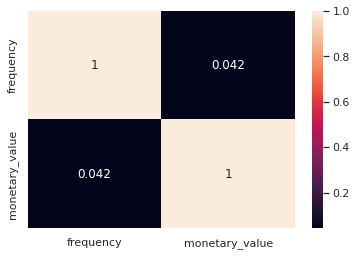

In [152]:
sns.heatmap(summary_copy[["frequency", "monetary_value"]].corr(), annot = True)

**GAMMA-GAMMA MODEL**

In [153]:
ggf_p = lifetimes.GammaGammaFitter(penalizer_coef = 0.0)

In [154]:
ggf_p.fit(summary_copy["frequency"], summary_copy["monetary_value"])

<lifetimes.GammaGammaFitter: fitted with 4215 subjects, p: 1.62, q: 3.59, v: 542.02>

In [155]:
ggf_p.summary

,coef,se(coef),lower 95% bound,upper 95% bound
p,1.620979,0.076165,1.471695,1.770263
q,3.591944,0.118468,3.359747,3.824142
v,542.021254,40.987722,461.685319,622.357189


In [156]:
summary_copy["expected_avg_sales_p"] = ggf_p.conditional_expected_average_profit(summary_copy["frequency"],
                                                                        summary_copy["monetary_value"])

In [157]:
summary_copy.head()

,CustomerID,frequency,recency,T,monetary_value,probability_alive,p_not_alive,p_alive,predicted_purchases,actual_30_p,p_error,expected_avg_sales_p
0,12346.0,10.0,400.0,725.0,7746.646000,0.137318,0.819912,0.180088,0.073989,0.750000,0.676011,6725.449188
1,12347.0,7.0,402.0,404.0,615.714286,0.974366,0.000634,0.999366,0.499741,0.522388,0.022647,564.254167
2,12348.0,4.0,363.0,438.0,449.310000,0.921982,0.034899,0.965101,0.277711,0.330579,0.052868,417.799874
3,12349.0,4.0,717.0,735.0,1107.172500,0.958573,0.003675,0.996325,0.180375,0.167364,-0.013011,887.785634
6,12352.0,8.0,356.0,392.0,338.261250,0.954478,0.017283,0.982717,0.568667,0.674157,0.105491,338.380191


In [158]:
avg_purchase_error = summary_copy["monetary_value"].mean() - summary_copy["expected_avg_sales_p"].mean()

In [159]:
print("Acutal Avg Sales: %s" % summary_copy["monetary_value"].mean())
print("Predicted Avg Sales: %s" % summary_copy["expected_avg_sales_p"].mean())
print("Mean Sqaured Error: %s" % mean_squared_error(summary_copy["monetary_value"], summary_copy["expected_avg_sales_p"]))
print("Root Mean Sqaured Error: %s" % sqrt(mean_squared_error(summary_copy["monetary_value"], summary_copy["expected_avg_sales_p"])))
print("Avg Sales Error: %s" % avg_purchase_error)

Acutal Avg Sales: 361.862400990899
Predicted Avg Sales: 358.39582855029596
Mean Sqaured Error: 390481.1697010098
Root Mean Sqaured Error: 624.8849251670341
Avg Sales Error: 3.466572440603045


In [160]:
actual = summary_copy["actual_30_p"] * summary_copy["monetary_value"]
predicted = summary_copy["predicted_purchases"] * summary_copy["expected_avg_sales_p"]

In [161]:
error = actual-predicted

In [162]:
result_p = pd.DataFrame([actual, predicted, error], index = ["Actual", "Predicted", "Error"]).T

In [163]:
print("Average Error: %s" % result_p["Error"].mean())
print("Mean Squared Error: %s" % mean_squared_error(result_p["Actual"], result_p["Predicted"]))
print("Root Mean Squared Error: %s" % sqrt(mean_squared_error(result_p["Actual"], result_p["Predicted"])))

Average Error: 139.05488788172508
Mean Squared Error: 2982846.849698617
Root Mean Squared Error: 1727.0920212017127


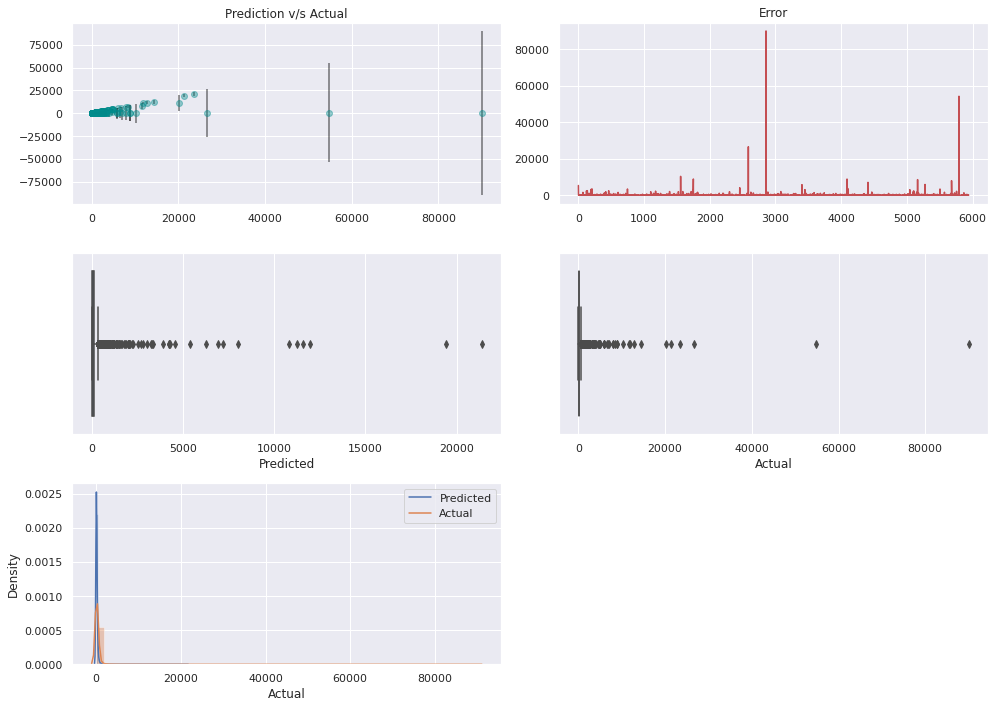

In [164]:
plt.figure(figsize=(14,10))
plt.subplot(321)
plt.errorbar(result_p["Actual"], result_p["Predicted"], yerr=result_p["Error"], fmt='o', color='darkcyan',
             ecolor='black', elinewidth=2, capsize=0, alpha = 0.4);
plt.title("Prediction v/s Actual")
plt.subplot(322)
plt.plot(result_p["Error"], color = 'r')
plt.title("Error")
plt.subplot(323)
sns.boxplot(result_p["Predicted"])
plt.subplot(324)
sns.boxplot(result_p["Actual"])
plt.subplot(325)
sns.distplot(result_p["Predicted"])
sns.distplot(result_p["Actual"])
plt.legend(["Predicted", "Actual"])
plt.tight_layout()

In [165]:
summary_copy["predicted_clv_p"] = ggf_p.customer_lifetime_value(pareto_nbd,
                                                       summary_copy["frequency"],
                                                       summary_copy["recency"],
                                                       summary_copy["T"],
                                                       summary_copy["monetary_value"],
                                                       time = 30,
                                                       freq = 'D',
                                                       discount_rate = 0.01)

In [166]:
summary_copy.shape

(4215, 13)

In [167]:
#Assuming 5% of Profit Margin
profit_margin = 0.05
summary_copy["CLV_p"] = summary_copy["predicted_clv_p"]*profit_margin

In [168]:
summary_copy.head()

,CustomerID,frequency,recency,T,monetary_value,probability_alive,p_not_alive,p_alive,predicted_purchases,actual_30_p,p_error,expected_avg_sales_p,predicted_clv_p,CLV_p
0,12346.0,10.0,400.0,725.0,7746.646000,0.137318,0.819912,0.180088,0.073989,0.750000,0.676011,6725.449188,4706.042021,235.302101
1,12347.0,7.0,402.0,404.0,615.714286,0.974366,0.000634,0.999366,0.499741,0.522388,0.022647,564.254167,5760.420750,288.021038
2,12348.0,4.0,363.0,438.0,449.310000,0.921982,0.034899,0.965101,0.277711,0.330579,0.052868,417.799874,2285.999812,114.299991
3,12349.0,4.0,717.0,735.0,1107.172500,0.958573,0.003675,0.996325,0.180375,0.167364,-0.013011,887.785634,3355.592538,167.779627
6,12352.0,8.0,356.0,392.0,338.261250,0.954478,0.017283,0.982717,0.568667,0.674157,0.105491,338.380191,3857.057347,192.852867


# **Modified Beta Geom + Gamma Gamma Distribution Model**

In [169]:
summary_mbg = summary.copy()

In [170]:
summary_mbg.head()

,CustomerID,frequency,recency,T,monetary_value
0,12346.0,10.0,400.0,725.0,7746.646000
1,12347.0,7.0,402.0,404.0,615.714286
2,12348.0,4.0,363.0,438.0,449.310000
3,12349.0,4.0,717.0,735.0,1107.172500
4,12350.0,0.0,0.0,310.0,0.000000


In [171]:
mbg = ModifiedBetaGeoFitter(penalizer_coef = 0.0)
mbg.fit(summary_mbg["frequency"], summary_mbg["recency"], summary_mbg["T"])

<lifetimes.ModifiedBetaGeoFitter: fitted with 5942 subjects, a: 0.18, alpha: 57.90, b: 2.05, r: 0.84>

In [172]:
mbg.summary

,coef,se(coef),lower 95% bound,upper 95% bound
r,0.837666,0.029295,0.780247,0.895084
alpha,57.895342,1.972543,54.029159,61.761525
a,0.180562,0.015152,0.150864,0.210260
b,2.045383,0.314244,1.429466,2.661301


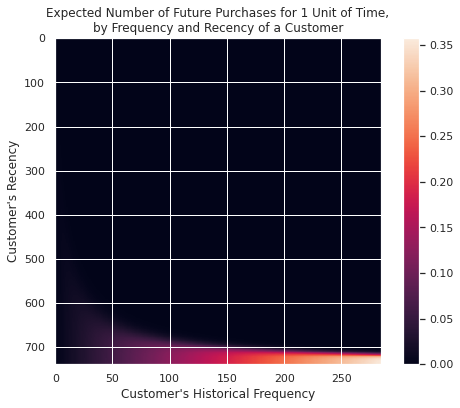

In [174]:
plt.figure(figsize=(8,6))
plot_frequency_recency_matrix(mbg)

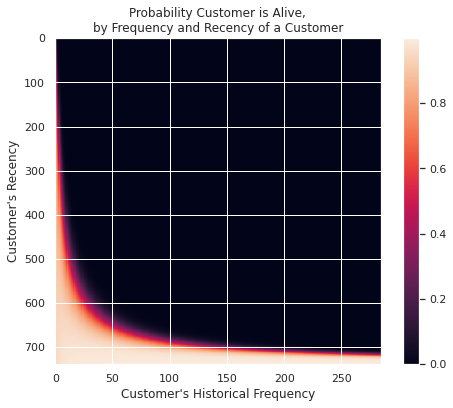

In [175]:
plt.figure(figsize=(8,6))
plot_probability_alive_matrix(mbg)

In [ ]:
summary_mbg["p_not_alive"] = 1-mbg.conditional_probability_alive(summary_mbg["frequency"], summary_mbg["recency"], summary_mbg["T"])
summary_mbg["p_alive"] = mbg.conditional_probability_alive(summary_mbg["frequency"], summary_mbg["recency"], summary_mbg["T"])

In [176]:
t = 30
summary_mbg["predicted_purchases"] = bgf.conditional_expected_number_of_purchases_up_to_time(t, summary_mbg["frequency"], summary_mbg["recency"], summary_mbg["T"])

In [177]:
summary_mbg

,CustomerID,frequency,recency,T,monetary_value,probability_alive,predicted_purchases
0,12346.0,10.0,400.0,725.0,7746.646000,0.137318,0.056541
1,12347.0,7.0,402.0,404.0,615.714286,0.974366,0.491299
2,12348.0,4.0,363.0,438.0,449.310000,0.921982,0.263606
3,12349.0,4.0,717.0,735.0,1107.172500,0.958573,0.170685
4,12350.0,0.0,0.0,310.0,0.000000,1.000000,0.055882
...,...,...,...,...,...,...,...
5937,18283.0,18.0,655.0,658.0,142.666667,0.987974,0.778669
5938,18284.0,1.0,2.0,431.0,0.000000,0.226983,0.023597
5939,18285.0,0.0,0.0,660.0,0.000000,1.000000,0.028394
5940,18286.0,2.0,247.0,723.0,416.740000,0.564755,0.058435


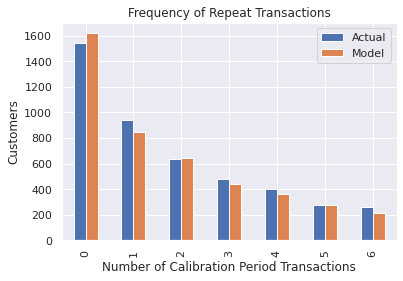

In [178]:
plot_period_transactions(mbg)

In [179]:
#dividing our dataset into training & holdout
summary_cal_holdout = calibration_and_holdout_data(data, "CustomerID", "InvoiceDate", 
                                                   calibration_period_end = '2011-06-08',
                                                  observation_period_end = '2011-12-09')

In [180]:
mbg.fit(summary_cal_holdout["frequency_cal"],
       summary_cal_holdout["recency_cal"],
       summary_cal_holdout["T_cal"])

<lifetimes.ModifiedBetaGeoFitter: fitted with 5025 subjects, a: 0.28, alpha: 56.91, b: 3.00, r: 0.84>

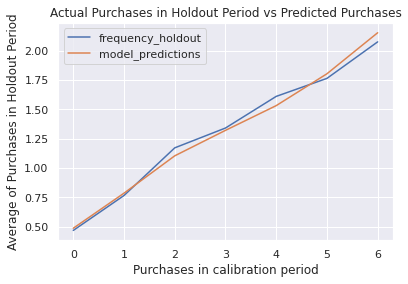

In [181]:
plot_calibration_purchases_vs_holdout_purchases(mbg, summary_cal_holdout)

In [182]:
summary_mbg["actual_30"] = summary_mbg["frequency"]/summary_mbg["recency"]*30

In [183]:
summary_mbg = summary_mbg.fillna(value = 0)

In [184]:
summary_mbg.head()

,CustomerID,frequency,recency,T,monetary_value,probability_alive,predicted_purchases,actual_30
0,12346.0,10.0,400.0,725.0,7746.646000,0.137318,0.056541,0.750000
1,12347.0,7.0,402.0,404.0,615.714286,0.974366,0.491299,0.522388
2,12348.0,4.0,363.0,438.0,449.310000,0.921982,0.263606,0.330579
3,12349.0,4.0,717.0,735.0,1107.172500,0.958573,0.170685,0.167364
4,12350.0,0.0,0.0,310.0,0.000000,1.000000,0.055882,0.000000


In [185]:
summary_mbg["Error"] = summary_mbg["actual_30"] - summary_mbg["predicted_purchases"]

In [186]:
mse = mean_squared_error(summary_mbg["actual_30"],summary_mbg["predicted_purchases"])

In [187]:
print("Mean Squared Error: %s" % mse)
print("Average Error:  %s" % summary_mbg["Error"].mean())
print("Root Mean Squared Error: %s" % sqrt(mse))

Mean Squared Error: 4.346082724386109
Average Error:  0.41709029134495595
Root Mean Squared Error: 2.0847260549976605


In [188]:
mbg_mse_purchase = mean_squared_error(summary_mbg["actual_30"],summary_mbg["predicted_purchases"])
mbg_rmse_purchase = sqrt(mean_squared_error(summary_mbg["actual_30"],summary_mbg["predicted_purchases"]))
mbg_avg_purchase_error = (summary_mbg["actual_30"].mean() - summary_mbg["predicted_purchases"].mean())

In [189]:
res_summary = summary_mbg[summary_mbg["frequency"] > 0]

In [190]:
final_summary = res_summary[res_summary["monetary_value"] > 0]

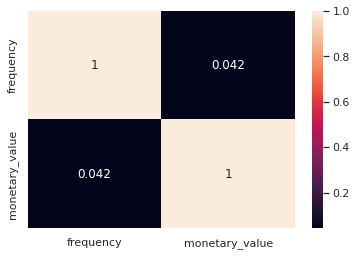

In [191]:
sns.heatmap(final_summary[["frequency", "monetary_value"]].corr(), annot = True)

In [192]:
ggf = lifetimes.GammaGammaFitter(penalizer_coef = 0.001)

In [193]:
ggf.fit(final_summary["frequency"], final_summary["monetary_value"])

<lifetimes.GammaGammaFitter: fitted with 4215 subjects, p: 11.18, q: 0.93, v: 11.23>

In [194]:
ggf.summary

,coef,se(coef),lower 95% bound,upper 95% bound
p,11.177764,0.218961,10.748601,11.606928
q,0.931950,0.017942,0.896784,0.967116
v,11.230563,0.225743,10.788107,11.673018


In [195]:
summary_mbg_new = summary_mbg[(summary_mbg["monetary_value"] > 0) & (summary_mbg["frequency"] > 0)]

In [196]:
summary_mbg_new

,CustomerID,frequency,recency,T,monetary_value,probability_alive,predicted_purchases,actual_30,Error
0,12346.0,10.0,400.0,725.0,7746.646000,0.137318,0.056541,0.750000,0.693459
1,12347.0,7.0,402.0,404.0,615.714286,0.974366,0.491299,0.522388,0.031089
2,12348.0,4.0,363.0,438.0,449.310000,0.921982,0.263606,0.330579,0.066973
3,12349.0,4.0,717.0,735.0,1107.172500,0.958573,0.170685,0.167364,-0.003321
6,12352.0,8.0,356.0,392.0,338.261250,0.954478,0.558628,0.674157,0.115529
...,...,...,...,...,...,...,...,...,...
5935,18281.0,1.0,397.0,577.0,80.820000,0.874298,0.069791,0.075567,0.005776
5936,18282.0,2.0,119.0,126.0,38.920000,0.937659,0.422312,0.504202,0.081890
5937,18283.0,18.0,655.0,658.0,142.666667,0.987974,0.778669,0.824427,0.045759
5940,18286.0,2.0,247.0,723.0,416.740000,0.564755,0.058435,0.242915,0.184480


In [197]:
summary_mbg_new["Expected_Avg_Sales"] = ggf.conditional_expected_average_profit(summary_mbg_new["frequency"], 
                                                                        summary_mbg_new["monetary_value"])

In [198]:
summary_mbg_new.head()

,CustomerID,frequency,recency,T,monetary_value,probability_alive,predicted_purchases,actual_30,Error,Expected_Avg_Sales
0,12346.0,10.0,400.0,725.0,7746.646000,0.137318,0.056541,0.750000,0.693459,7752.488768
1,12347.0,7.0,402.0,404.0,615.714286,0.974366,0.491299,0.522388,0.031089,617.856010
2,12348.0,4.0,363.0,438.0,449.310000,0.921982,0.263606,0.330579,0.066973,452.806812
3,12349.0,4.0,717.0,735.0,1107.172500,0.958573,0.170685,0.167364,-0.003321,1111.672104
6,12352.0,8.0,356.0,392.0,338.261250,0.954478,0.558628,0.674157,0.115529,339.923752


In [199]:
print("Expected Average Sales: %s" % summary_mbg_new["Expected_Avg_Sales"].mean())
print("Actual Average Sales: %s" % summary_mbg_new["monetary_value"].mean())
print("Difference: %s" % (summary_mbg_new["monetary_value"].mean() - summary_mbg_new["Expected_Avg_Sales"].mean()))
print("Mean Squared Error: %s" % mean_squared_error(summary_mbg_new["monetary_value"], summary_mbg_new["Expected_Avg_Sales"]))
print("Root Mean Squared Error: %s" % sqrt(mean_squared_error(summary_mbg_new["monetary_value"], summary_mbg_new["Expected_Avg_Sales"])))

Expected Average Sales: 366.82898415306636
Actual Average Sales: 361.862400990899
Difference: -4.966583162167353
Mean Squared Error: 65.79109301822459
Root Mean Squared Error: 8.111170878376598


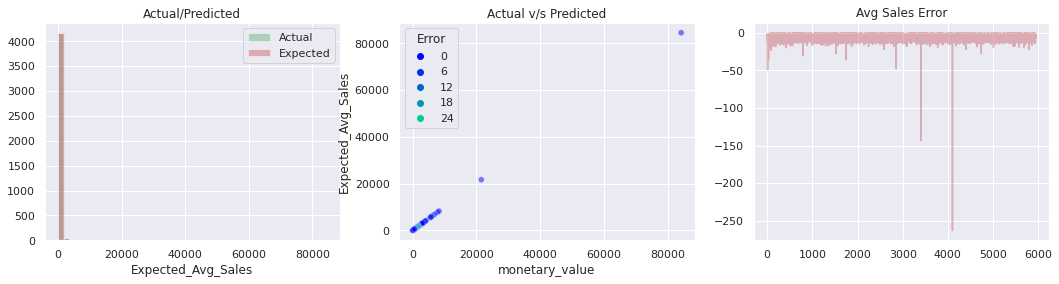

In [200]:
plt.figure(figsize=(18,4))
plt.subplot(131)
sns.distplot(summary_mbg_new["monetary_value"], color = "g", kde = False)
sns.distplot(summary_mbg_new["Expected_Avg_Sales"], color = "r", kde = False)
plt.title("Actual/Predicted")
plt.legend(["Actual", "Expected"])
plt.subplot(132)
sns.scatterplot(summary_mbg_new["monetary_value"], summary_mbg_new["Expected_Avg_Sales"], alpha = 0.5, hue = summary_["Error"], palette = "winter")
plt.title("Actual v/s Predicted")
plt.subplot(133)
plt.plot(summary_mbg_new["monetary_value"]-summary_mbg_new["Expected_Avg_Sales"], color = 'r', alpha = 0.4)
plt.title("Avg Sales Error")
plt.show()

In [201]:
summary_mbg_new["predicted_clv"] = ggf.customer_lifetime_value(mbg,
                                                       summary_mbg_new["frequency"],
                                                       summary_mbg_new["recency"],
                                                       summary_mbg_new["T"],
                                                       summary_mbg_new["monetary_value"],
                                                       time = 30,
                                                       freq = 'D',
                                                       discount_rate = 0.01)

In [202]:
summary_mbg_new

,CustomerID,frequency,recency,T,monetary_value,probability_alive,predicted_purchases,actual_30,Error,Expected_Avg_Sales,predicted_clv
0,12346.0,10.0,400.0,725.0,7746.646000,0.137318,0.056541,0.750000,0.693459,7752.488768,9131.334507
1,12347.0,7.0,402.0,404.0,615.714286,0.974366,0.491299,0.522388,0.031089,617.856010,6873.134150
2,12348.0,4.0,363.0,438.0,449.310000,0.921982,0.263606,0.330579,0.066973,452.806812,2785.819736
3,12349.0,4.0,717.0,735.0,1107.172500,0.958573,0.170685,0.167364,-0.003321,1111.672104,4624.201385
6,12352.0,8.0,356.0,392.0,338.261250,0.954478,0.558628,0.674157,0.115529,339.923752,4255.050634
...,...,...,...,...,...,...,...,...,...,...,...
5935,18281.0,1.0,397.0,577.0,80.820000,0.874298,0.069791,0.075567,0.005776,92.614399,169.828019
5936,18282.0,2.0,119.0,126.0,38.920000,0.937659,0.422312,0.504202,0.081890,44.671261,406.130069
5937,18283.0,18.0,655.0,658.0,142.666667,0.987974,0.778669,0.824427,0.045759,143.339067,2579.500707
5940,18286.0,2.0,247.0,723.0,416.740000,0.564755,0.058435,0.242915,0.184480,423.644855,610.910482


In [203]:
profit_margin = 0.05
summary_mbg_new["CLV"] = summary_mbg_new["predicted_clv"]*profit_margin

In [204]:
actual = summary_["monetary_value"]*summary_["actual_30"]
pred = summary_["Expected_Avg_Sales"]*summary_["predicted_purchases"]
error = actual - pred
result = pd.DataFrame([actual, pred, error], index = ["Actual", "Predicted", "Error"]).T

In [205]:
print("Average Error: %s" % result["Error"].mean())
print("Mean Squared Error: %s" % (mean_squared_error(result["Actual"], result["Predicted"])))
print("Root Mean Squared Error: %s" % sqrt(mean_squared_error(result["Actual"], result["Predicted"])))

Average Error: 137.178030469121
Mean Squared Error: 2943006.0021346095
Root Mean Squared Error: 1715.519164024293


In [206]:
summary_mbg_new

,CustomerID,frequency,recency,T,monetary_value,probability_alive,predicted_purchases,actual_30,Error,Expected_Avg_Sales,predicted_clv,CLV
0,12346.0,10.0,400.0,725.0,7746.646000,0.137318,0.056541,0.750000,0.693459,7752.488768,9131.334507,456.566725
1,12347.0,7.0,402.0,404.0,615.714286,0.974366,0.491299,0.522388,0.031089,617.856010,6873.134150,343.656708
2,12348.0,4.0,363.0,438.0,449.310000,0.921982,0.263606,0.330579,0.066973,452.806812,2785.819736,139.290987
3,12349.0,4.0,717.0,735.0,1107.172500,0.958573,0.170685,0.167364,-0.003321,1111.672104,4624.201385,231.210069
6,12352.0,8.0,356.0,392.0,338.261250,0.954478,0.558628,0.674157,0.115529,339.923752,4255.050634,212.752532
...,...,...,...,...,...,...,...,...,...,...,...,...
5935,18281.0,1.0,397.0,577.0,80.820000,0.874298,0.069791,0.075567,0.005776,92.614399,169.828019,8.491401
5936,18282.0,2.0,119.0,126.0,38.920000,0.937659,0.422312,0.504202,0.081890,44.671261,406.130069,20.306503
5937,18283.0,18.0,655.0,658.0,142.666667,0.987974,0.778669,0.824427,0.045759,143.339067,2579.500707,128.975035
5940,18286.0,2.0,247.0,723.0,416.740000,0.564755,0.058435,0.242915,0.184480,423.644855,610.910482,30.545524


In [208]:
predicted_clv_results = pd.DataFrame(summary_[["CustomerID", "predicted_clv"]])

In [210]:
predicted_clv_results = predicted_clv_results.merge(summary_copy[["CustomerID", "predicted_clv_p"]], on = "CustomerID")

In [211]:
predicted_clv_results = predicted_clv_results.merge(summary_mbg_new[["CustomerID", "predicted_clv"]], on = "CustomerID")

In [212]:
predicted_clv_results.columns = ["CustomerID", "BG-NBD", "Pareto-NBD", "MBG-NBD"]

In [213]:
predicted_clv_results.head(10)

,CustomerID,BG-NBD,Pareto-NBD,MBG-NBD
0,12346.0,10442.457246,4706.042021,9131.334507
1,12347.0,6978.024200,5760.420750,6873.134150
2,12348.0,2774.547678,2285.999812,2785.819736
3,12349.0,4551.906658,3355.592538,4624.201385
4,12352.0,4350.644771,3857.057347,4255.050634
5,12353.0,212.102794,452.105296,231.636774
6,12355.0,788.183405,567.758063,864.357623
7,12356.0,8683.326081,6543.472718,8651.460400
8,12357.0,15296.570549,6239.878797,16648.231557
9,12358.0,2553.205334,2054.826727,2594.135831


**Purchase Prediction Result Summary**

In [214]:
indexes = ["MSE Purchase Error", "RMSE Purchase Error","Avg Purchase Error"]

In [215]:
data = [[bgf_mse_purchase_30, pareto_mse_purchase, mbg_mse_purchase],
[bgf_rmse_purchase_30, pareto_rmse_purchase, mbg_rmse_purchase], [bgf_avg_error_purchase_30, pareto_avg_error_purchase, mbg_avg_purchase_error]]

In [216]:
model_purchase_result = pd.DataFrame(data, columns = ["BG-NBD", "Pareto-NBD", "MBG-NBD"], index = indexes)

In [217]:
model_purchase_result

,BG-NBD,Pareto-NBD,MBG-NBD
MSE Purchase Error,4.337883,4.335935,4.346083
RMSE Purchase Error,2.082758,2.082291,2.084726
Avg Purchase Error,0.411798,0.412367,0.417090


**Conclusion:** As we can see here is that there is no much difference when it comes to the performance of these models but Pareto NBD model is slightly performing better when it comes to minimizing the MSE & RMSE Errors.